## Opening the right lidar .tif file from the target crs point 

In [45]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapefile

import geopy as gp
import folium

from shapely.geometry import Point, Polygon

import rasterio as rio
from rasterio.plot import show
from rasterio.windows import Window

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [46]:
target = 199414.11489207728, 223588.5598308323


In [47]:
target

(199414.11489207728, 223588.5598308323)

#### setting target as shapely point and constructing polygon buffer around it 

In [48]:
def target_to_point(target):                                                                                                                  
    return Point(target[0], target[1])

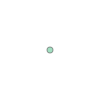

In [49]:
target_to_point(target)

In [50]:
def bbox_to_polygon(bbox):                                                                                                                  
    return Polygon([[bbox[0], bbox[1]],[bbox[0], bbox[3]],
    [bbox[2],bbox[3]],[bbox[2],bbox[1]]])

In [51]:
shp_glob = shapefile.Reader('../api/src/data/DSM_vlaanderen/DHMVIIDSMRAS1m_k09/DHMVII_vdc_k09/DHMVII_vdc_k09.shp') 

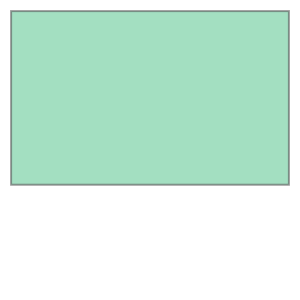

In [52]:
bbox_to_polygon(shp_glob.bbox)

In [53]:
bbox_to_polygon(shp_glob.bbox).contains(target_to_point(target))

True

#### identifying lidar .tif file from target  

locate from .shp file and pointing to right .tif

using the shapely 'polygon.contains(tpoint)' command

In [54]:
def finding_tif(target):
    path_shp = ""
    number_tif = [x for x in range(1, 11)]
    for i in number_tif :
        shp = shapefile.Reader(f'../api/src/data/DSM_vlaanderen/DHMVIIDSMRAS1m_k{i:02}/DHMVII_vdc_k{i:02}/DHMVII_vdc_k{i:02}.shp') 
#         shp = shapefile.Reader(shp_path)
        shp_polygon = bbox_to_polygon(shp.bbox)
        target_point = target_to_point(target)
        buf = target_point.buffer(40, cap_style=3)
        if  shp_polygon.contains(target_point) == True :
            dsm_path = f'../api/src/data/DSM_vlaanderen/DHMVIIDSMRAS1m_k{i:02}/GeoTIFF/DHMVIIDSMRAS1m_k{i:02}.tif'
            with rio.open(dsm_path) as dsm:
                out_image, out_transform = rio.mask.mask(dsm, [buf], crop=True, filled=False)
        else:
            pass
    print(f'The right path to tiff is {dsm_path}')
    show(out_image)

In [55]:
target

(199414.11489207728, 223588.5598308323)

The right path to tiff is ../api/src/data/DSM_vlaanderen/DHMVIIDSMRAS1m_k09/GeoTIFF/DHMVIIDSMRAS1m_k09.tif


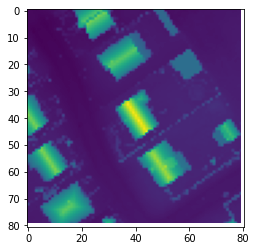

In [56]:
finding_tif(target)